In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma  # gamma function

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("/content/student_exam_data.csv")
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [5]:
df['Pass/Fail'] = np.where(df['Study Hours'] < 2, 0, df['Pass/Fail'])

In [6]:
# Transform features using gamma function
df['StudyHours_Gamma'] = df['Study Hours'].apply(lambda x: gamma(x+1))  # gamma(x+1) ~ factorial(x)
df['PrevScore_Gamma'] = df['Previous Exam Score'].apply(lambda x: gamma(x/10 + 1))  # scaled to avoid huge numbers

# Features and target
X = df[['StudyHours_Gamma', 'PrevScore_Gamma']]
y = df['Pass/Fail']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
DT = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    random_state=42
)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [9]:
y_pred = DT.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.99


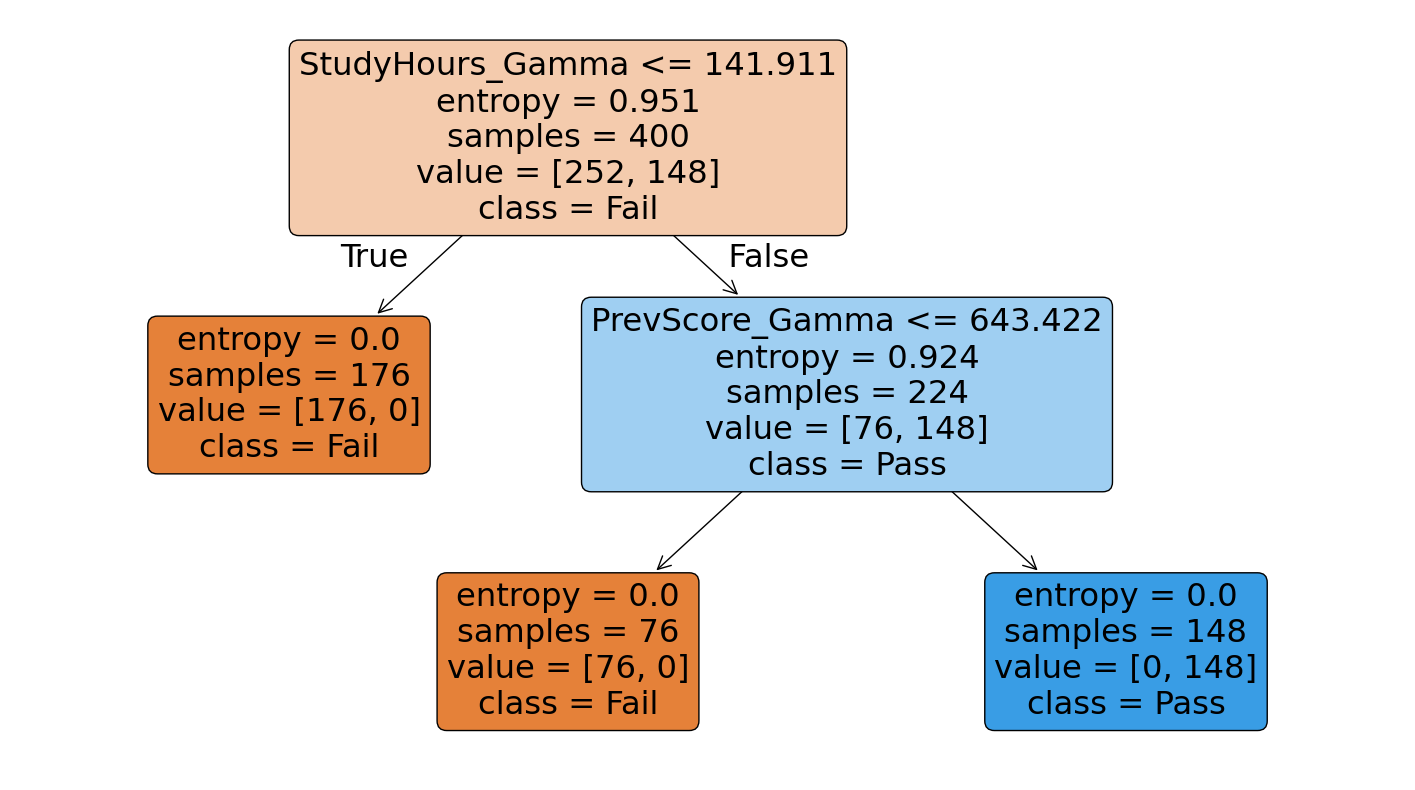

In [10]:
plt.figure(figsize=(18, 10))
plot_tree(
    DT,
    feature_names=['StudyHours_Gamma', 'PrevScore_Gamma'],
    class_names=['Fail', 'Pass'],
    filled=True,
    rounded=True
)
plt.show()

In [11]:
import pickle
with open("Decisiontree_gamma.pkl","wb") as f:
  pickle.dump(DT,f)
from google.colab import files
files.download('Decisiontree_gamma.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>